In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("src")  # so you can `import grid`, `import solvers`, etc.


In [3]:
print(sys.executable)
print(sys.path[0])


c:\Users\31624\Documents\MIT\Programming\FreqTransfer\.venv\Scripts\python.exe
C:\Program Files\Prodrive Motion Platform\3.80.2.1cb3e041\miscellaneous\pyxml2xml


In [5]:
import os, sys

PROJECT_ROOT = r"C:\Users\31624\Documents\MIT\Programming\FreqTransfer"

# 1) Ensure we run from the project root
os.chdir(PROJECT_ROOT)

# 2) Make sure we import the package (NOT the src folder directly)
#    Remove any existing 'src' path entries or stray Prodrive paths.
sys.path[:] = [
    p for p in sys.path
    if "FreqTransfer\\src" not in p
    and "Prodrive Motion Platform" not in p
]

# 3) Put the project root at the front so `import src` works
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

print("Python:", sys.executable)
print("CWD   :", os.getcwd())
print("sys.path[0:3]:", sys.path[:3])


Python: c:\Users\31624\Documents\MIT\Programming\FreqTransfer\.venv\Scripts\python.exe
CWD   : C:\Users\31624\Documents\MIT\Programming\FreqTransfer
sys.path[0:3]: ['C:\\Users\\31624\\Documents\\MIT\\Programming\\FreqTransfer', 'C:\\Users\\31624\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip', 'C:\\Users\\31624\\AppData\\Local\\Programs\\Python\\Python312\\DLLs']


In [6]:
from src import (
    GridSpec, FDConfig, PMLConfig, SolverOptions,
    assemble_operator,
    PointSource, RandomPointSource, build_load,
    gmres_solve, plot_residuals, plot_field
)


In [7]:
import os, sys
PROJECT_ROOT = r"C:\Users\31624\Documents\MIT\Programming\FreqTransfer"
os.chdir(PROJECT_ROOT)
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

from src import (
    GridSpec, FDConfig, PMLConfig, SolverOptions,
    assemble_operator,
    PointSource, RandomPointSource, build_load,
    gmres_solve, plot_residuals, plot_field,
)


Direct solve: converged=True, info=0, n=3600


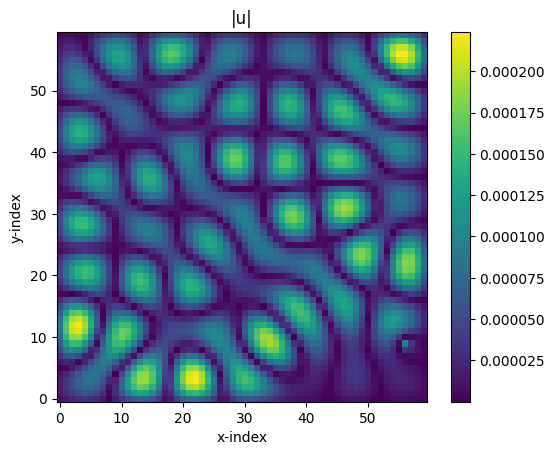

In [9]:
# --- setup ---
from src import (
    GridSpec, PMLConfig, assemble_operator,
    RandomPointSource, build_load,
    direct_solve, plot_field
)

grid = GridSpec(2, (60, 60), (1.0, 1.0))
k = 30.0

A = assemble_operator(grid=grid, k=k, kind="helmholtz")   # no PML
b = build_load(RandomPointSource(seed=1), grid)

# --- direct solve (sparse LU) ---
res = direct_solve(A, b)   # returns SolverResult with .solution, .converged, .info
print(f"Direct solve: converged={res.converged}, info={res.info}, n={A.shape[0]}")

# visualize
_ = plot_field(res.solution, shape=grid.shape, which="magnitude")


PML direct: converged=True, info=0


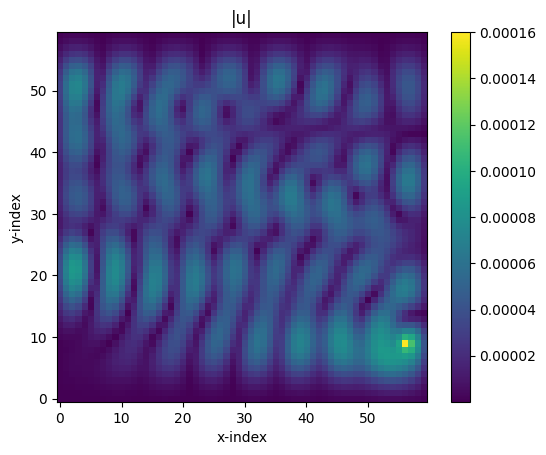

In [10]:
pml = PMLConfig(thickness=8, m=3, sigma_max=50.0)
A_pml = assemble_operator(grid=grid, k=k, kind="helmholtz", pml=pml)
res_pml = direct_solve(A_pml, b)
print(f"PML direct: converged={res_pml.converged}, info={res_pml.info}")
_ = plot_field(res_pml.solution, shape=grid.shape, which="magnitude")
